## Notebook using the permuted model for the saliency maps

### Calculate similarity between the 10 images accross the permuted and unpermuted moddel
You can download the normal model from: https://polybox.ethz.ch/index.php/s/RCyBO2038Aph6Cz

and the permuted model from: https://polybox.ethz.ch/index.php/s/qPANT5AFDrrurER

The 10 images used are those that you can find here: https://polybox.ethz.ch/index.php/s/7eLrhKFe34UW3tW

In [1]:
from torch.utils import data
import torchvision
from models.grad_cam import CNN_grad_cam, display_datasets_heatmap
import torch
import torchvision.transforms as transforms


In [2]:
model_permuted = torch.load('models/model_permuted.pth')

In [3]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)
trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])

In [4]:
data_for_saliency_maps =  torchvision.datasets.ImageFolder('archive/chest_xray/img_for_saliency', transform=trans0)
dataloader_grad_cam = data.DataLoader(data_for_saliency_maps, shuffle=False, batch_size=1)

## Grad cam

In [5]:
model_permuted_grad_cam = CNN_grad_cam(model_permuted)

0 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1


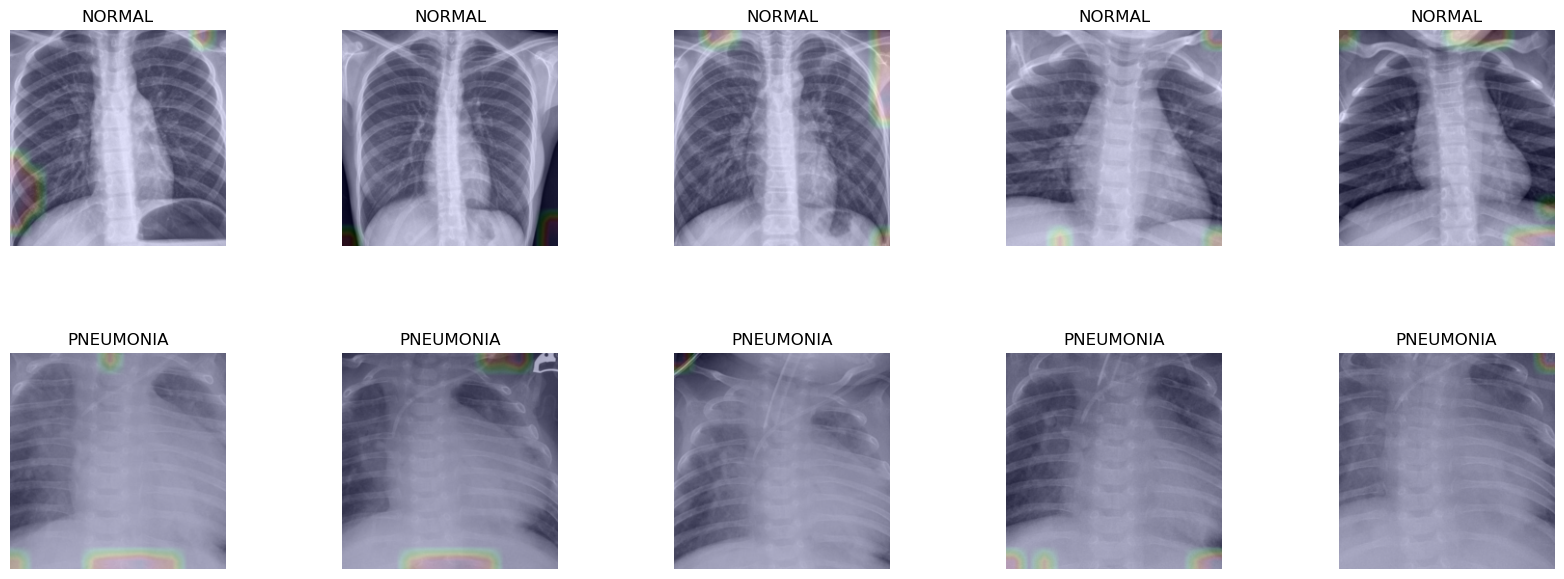

In [12]:
display_datasets_heatmap(model_permuted_grad_cam, dataloader_grad_cam)

If you want an output without tresholds on the heatmap use display_datasets_heatmap(...., threshold= 0)

In [8]:
from models.grad_cam import heatmap_grad_cam
from models.permutation_test import similarity_of_images
import numpy as np

In [9]:
model_not_permuted = CNN_grad_cam(torch.load('models/20_model.pth'))
model_permuted = CNN_grad_cam(torch.load('models/model_permuted.pth'))

In [10]:
sim_scores = similarity_of_images(model_not_permuted, model_permuted, dataloader_grad_cam,heatmap_grad_cam)

-0.18389679508475337

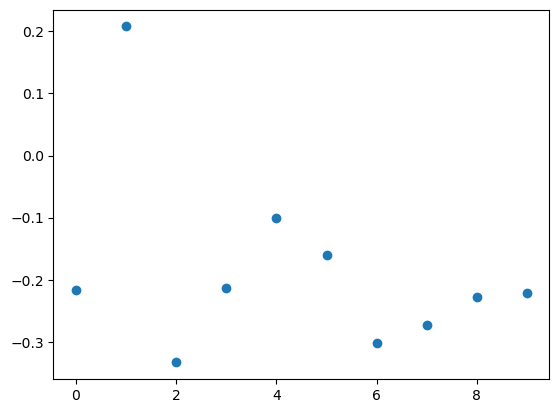

In [11]:
#plot similarity scores as scatter plot
import matplotlib.pyplot as plt
plt.scatter(range(len(sim_scores)), sim_scores)
np.mean(sim_scores)


### Make a combined plot with the similarity values of both method

## Integrated Gradients